# Code Quick Start 

A handy set of commands that can be copy and pasted to run CFL quickly. 

We recommend running `cfl` from within either a python script (i.e. a `.py` file) or a Jupyter Notebook. A python script can be easier to run quickly, but a Jupyter Notebook is more interactive.

### 1. Import CFL

In [1]:
from cfl.experiment import Experiment

### 2. Load your data as a numpy array 

In [2]:
# generate random data (replace this with your actual data)
n_samples = 500 

import numpy as np
X = np.random.random((n_samples, 40)) # X data has 40 features
Y = np.random.random((n_samples, 3))  # Y data has only 3 features 

# print the data shape 
# both data sets should be in the shape (n_samples, n_features) (unless using a CNN) 
print(X.shape)
print(Y.shape)

(500, 40)
(500, 3)


### 3. Create parameter dictionaries 

In [3]:
# Create 3 dictionaries: one for data info, one with CDE parameters, and one with cluster parameters

# the parameters should be passed in dictionary form 
data_info = {'X_dims' : X.shape, 
             'Y_dims' : Y.shape, 
             'Y_type' : 'continuous' #options: 'categorical' or 'continuous'
            }

# pass in empty parameter dictionaries to use the default parameter values (not 
# allowed for data_info)
CDE_params = {  'model'       : 'CondExpMod',
                'dense_units' : [50, data_info['Y_dims'][1]], # model creation parameters
                'activations' : ['relu', 'linear'],
                'dropouts'    : [0, 0],

                'batch_size'  : 32, # parameters for training 
                'n_epochs'    : 20,
                'optimizer'   : 'adam',
                'opt_config'  : {},
                'loss'        : 'mean_squared_error',
                'best'        : True, 

                'verbose'     : 1, # amount of output to print 
                'show_plot'   : True,
            }

# cluster_params consists of specifying two sklearn clustering objects
cause_cluster_params =  {'model' : 'KMeans', 'n_clusters' : 4, 'verbose' : 0}
effect_cluster_params = {'model' : 'KMeans', 'n_clusters' : 2, 'verbose' : 0}

### 4. Set up the CFL pipeline 

In [4]:
# block_names indicates which CDE and clustering models to use 
block_names = ['CDE', 'CauseClusterer', 'EffectClusterer']

# block_params is aligned to block_names
block_params = [CDE_params, cause_cluster_params, effect_cluster_params] 

save_path = 'sample_run' # directory to save results to 

# Create a new CFL experiment with specified parameters
my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, block_names=block_names, block_params=block_params, results_path=save_path)

save_path 'sample_run' doesn't exist, creating now.
All results from this run will be saved to sample_run/experiment0000
weights_path not specified in input, defaulting to None
standardize not specified in input, defaulting to False
tb_path not specified in input, defaulting to None


### 5. Train the CFL model on the data 

#################### Beginning CFL Experiment training. ####################
Beginning CDE training...
No GPU device detected.
Train on 375 samples, validate on 125 samples
Epoch 1/20
375/375 [==============================] - 7s 19ms/sample - loss: 0.3573 - val_loss: 0.1694
Epoch 2/20
375/375 [==============================] - 0s 642us/sample - loss: 0.1486 - val_loss: 0.1537
Epoch 3/20
375/375 [==============================] - 0s 872us/sample - loss: 0.1408 - val_loss: 0.1367
Epoch 4/20
375/375 [==============================] - 0s 975us/sample - loss: 0.1269 - val_loss: 0.1326
Epoch 5/20
375/375 [==============================] - 0s 904us/sample - loss: 0.1203 - val_loss: 0.1311
Epoch 6/20
375/375 [==============================] - 0s 1ms/sample - loss: 0.1148 - val_loss: 0.1258
Epoch 7/20
375/375 [==============================] - 0s 773us/sample - loss: 0.1106 - val_loss: 0.1236
Epoch 8/20
375/375 [==============================] - 0s 810us/sample - loss: 0.1065 - val_loss: 0.121

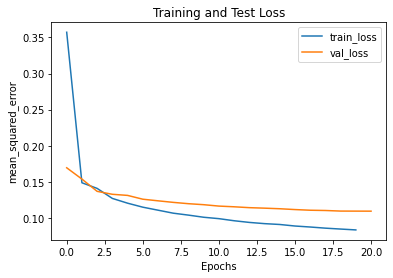

Loading parameters from  tmp_checkpoints21102021172533/best_weights
Saving parameters to  sample_run/experiment0000/trained_blocks/CDE
CDE training complete.
Beginning CauseClusterer training...


100%|██████████| 500/500 [00:00<00:00, 3910.47it/s]

CauseClusterer training complete.
Beginning EffectClusterer training...


EffectClusterer training complete.
Experiment training complete.


In [5]:
results = my_exp.train()

### 6. Visualizing Results 

Please refer to the [Macrostate Visualization](https://cfl.readthedocs.io/en/latest/examples/basic_visualizations.html)
notebook for an example of how to visualize CFL results.


### 7. Tuning CFL

Once you've set up a CFL pipeline, it needs to be tuned like any other machine learning model. 

To tune the CDE step, play with the parameters used in model creation/training (in `CDE_params`), or swap in another CDE entirely (available models can be found in `cfl.density_estimation_methods`). 

To tune the clustering step, change the parameters of the clustering models you use or substitute in different clustering method(s). 

Use the customary techniques for tuning machine learning hyperparameters to assist you. 